## assignment 2

Data: Use data from “Public school Data.zip” to answer questions Q2, Q3 and Q4  
through Visuals + Contexts

Q4. Plot the distribution of Schools’ FT_TEACHER over states and indicate which highest, lowest of High and Elementary schools. 

In [49]:
from   zipfile  import  ZipFile  as  zf 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd

with  zf('data/Public_Schools.zip','r')  as  fp: 
    fp.extractall('data')

schools = gpd.read_file('data/Public_Schools/PublicSchools.shp')

schools.head()

,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID,geometry
0,1,170330000017,ALDEN-HEBRON HIGH SCHOOL,9604 ILLINOIS ST,HEBRON,IL,60034,9618,(815) 648-2442,1,...,2010-08-27,http://www.alden-hebron.org,HIGH,104,09,12,1703300,-999,NOT AVAILABLE,POINT (-88.43101 42.46557)
1,2,370297001287,WESTERLY HILLS ACADEMY,4420 DENVER AVE,CHARLOTTE,NC,28208,3699,(980) 343-6021,1,...,2016-08-22,http://westerlyhillsacademy.wearecms.com,ELEMENTARY,414,PK,05,3702970,31,NOT AVAILABLE,POINT (-80.9115 35.23191)
2,3,180369000584,NORTHWOOD ELEMENTARY SCHOOL,965 GRIZZLY CUB DR,FRANKLIN,IN,46131,1364,(317) 346-8900,1,...,2010-08-02,NOT AVAILABLE,ELEMENTARY,442,PK,04,1803690,28,NOT AVAILABLE,POINT (-86.06243 39.48975)
3,4,040187003479,DR. GARY AND ANNETTE AUXIER ELEMENTARY SCHOOL,22700 S POWER RD,QUEEN CREEK,AZ,85142,4507,(480) 424-8400,1,...,2018-10-24,http://www.cusd80.com/Domain/1666,ELEMENTARY,820,PK,06,0401870,51,NOT AVAILABLE,POINT (-111.68731 33.24289)
4,5,040187003483,DR. CAMILLE CASTEEL HIGH SCHOOL,24901 S POWER RD,QUEEN CREEK,AZ,85142,8428,(480) 424-8100,1,...,2018-10-24,http://www.cusd80.com/casteelhigh,HIGH,3269,07,12,0401870,143,NOT AVAILABLE,POINT (-111.68377 33.22217)


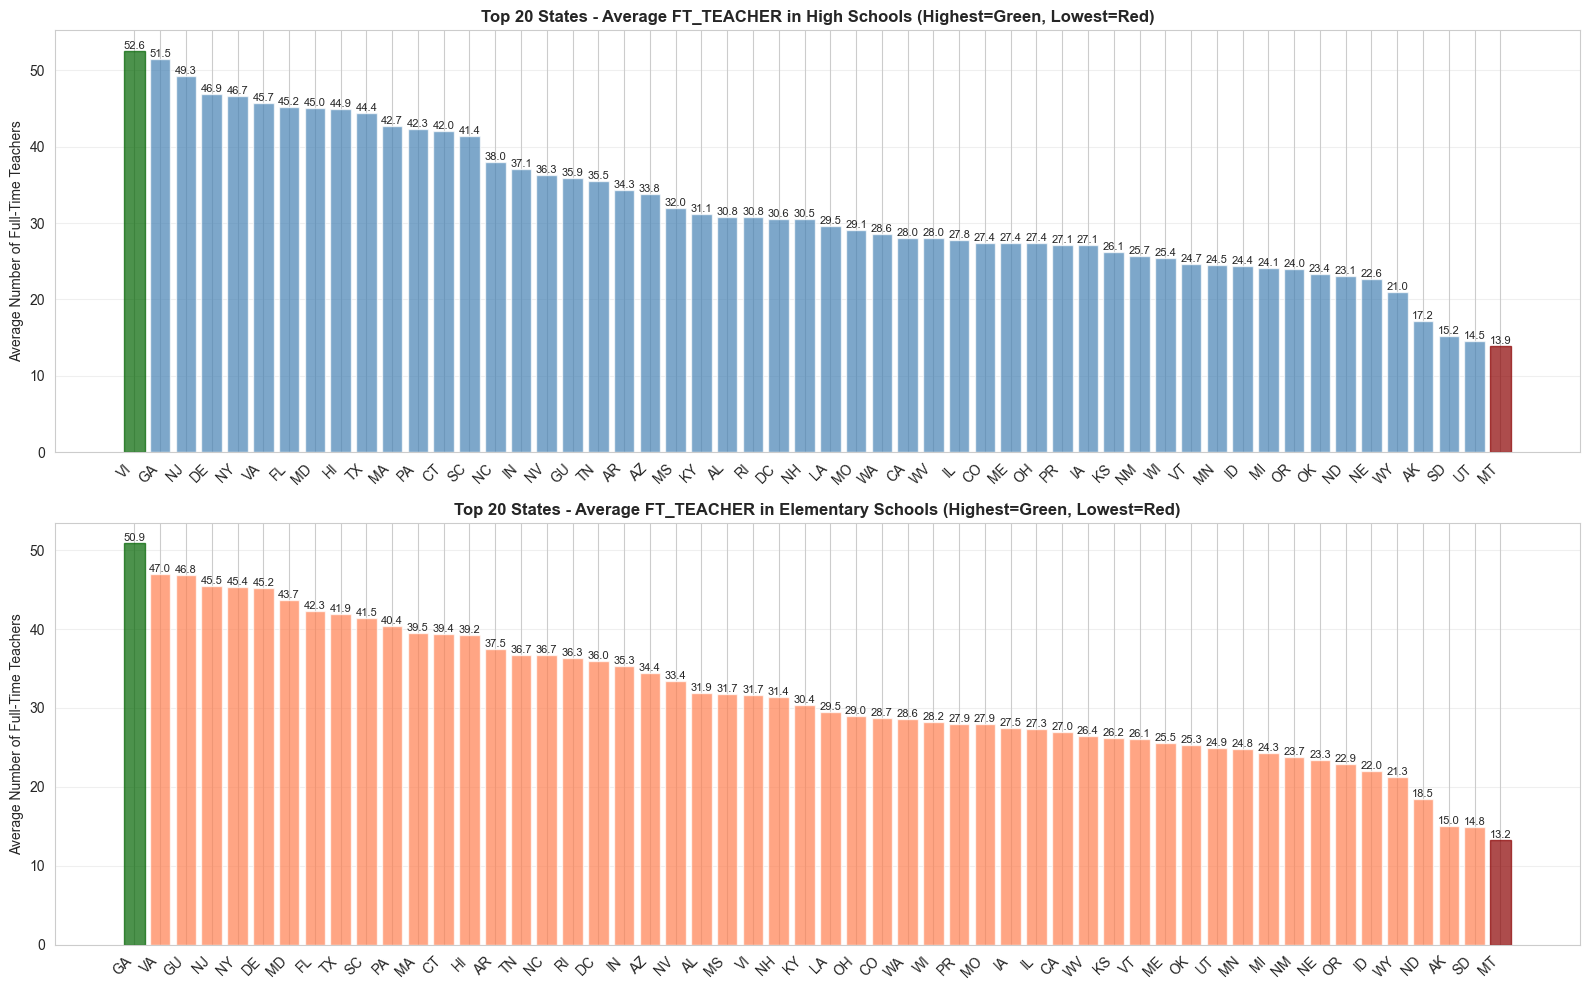


HIGH SCHOOLS - FT_TEACHER DISTRIBUTION BY STATE

🟢 HIGHEST average: VI with 52.60 teachers
   (Based on 5 high schools)

🔴 LOWEST average:  MT with 13.86 teachers
   (Based on 200 high schools)

ELEMENTARY SCHOOLS - FT_TEACHER DISTRIBUTION BY STATE

🟢 HIGHEST average: GA with 50.91 teachers
   (Based on 1243 elementary schools)

🔴 LOWEST average:  MT with 13.25 teachers
   (Based on 424 elementary schools)

SUMMARY
Total high schools analyzed: 20721
Total elementary schools analyzed: 47329
States with high school data: 54
States with elementary school data: 54


In [ ]:

# Keep only needed columns
schools = schools[['STATE','LEVEL_','FT_TEACHER']]

# Filter for High and Elementary schools
schools_filtered = schools[schools['LEVEL_'].isin(['HIGH', 'ELEMENTARY'])]

# Remove invalid FT_TEACHER values (-999 = missing data)
schools_filtered = schools_filtered[schools_filtered['FT_TEACHER'] > 0]

# Separate data by school level
high_schools = schools_filtered[schools_filtered['LEVEL_'] == 'HIGH']
elementary_schools = schools_filtered[schools_filtered['LEVEL_'] == 'ELEMENTARY']

# Calculate summary statistics per state
high_stats = high_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()
elem_stats = elementary_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Create visualization - states by average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Sort by mean FT_TEACHER  head() can be used to limit to top 20 if needed
high_stats_sorted = high_stats.sort_values('mean', ascending=False)
elem_stats_sorted = elem_stats.sort_values('mean', ascending=False)

# Plot High Schools
x_pos = np.arange(len(high_stats_sorted))
bars1 = ax1.bar(x_pos, high_stats_sorted['mean'], color='steelblue', alpha=0.7)

# Highlight highest and lowest
bars1[0].set_color('darkgreen')
bars1[-1].set_color('darkred')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(high_stats_sorted['STATE'], rotation=45, ha='right')
ax1.set_ylabel('Average Number of Full-Time Teachers')
ax1.set_title('States - Average FT_TEACHER in High Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(high_stats_sorted.iterrows()):
    ax1.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

# Plot Elementary Schools
x_pos2 = np.arange(len(elem_stats_sorted))
bars2 = ax2.bar(x_pos2, elem_stats_sorted['mean'], color='coral', alpha=0.7)
# Highlight highest and lowest
bars2[0].set_color('darkgreen')
bars2[-1].set_color('darkred')

ax2.set_xticks(x_pos2)
ax2.set_xticklabels(elem_stats_sorted['STATE'], rotation=45, ha='right')
ax2.set_ylabel('Average Number of Full-Time Teachers')
ax2.set_title('States - Average FT_TEACHER in Elementary Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(elem_stats_sorted.iterrows()):
    ax2.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*70)
print("HIGH SCHOOLS - FT_TEACHER DISTRIBUTION BY STATE")
print("="*70)
highest_high = high_stats.loc[high_stats['mean'].idxmax()]
lowest_high = high_stats.loc[high_stats['mean'].idxmin()]
print(f"\n🟢 HIGHEST average: {highest_high['STATE']} with {highest_high['mean']:.2f} teachers")
print(f"   (Based on {int(highest_high['count'])} high schools)")
print(f"\n🔴 LOWEST average:  {lowest_high['STATE']} with {lowest_high['mean']:.2f} teachers")
print(f"   (Based on {int(lowest_high['count'])} high schools)")

print("\n" + "="*70)
print("ELEMENTARY SCHOOLS - FT_TEACHER DISTRIBUTION BY STATE")
print("="*70)
highest_elem = elem_stats.loc[elem_stats['mean'].idxmax()]
lowest_elem = elem_stats.loc[elem_stats['mean'].idxmin()]
print(f"\n🟢 HIGHEST average: {highest_elem['STATE']} with {highest_elem['mean']:.2f} teachers")
print(f"   (Based on {int(highest_elem['count'])} elementary schools)")
print(f"\n🔴 LOWEST average:  {lowest_elem['STATE']} with {lowest_elem['mean']:.2f} teachers")
print(f"   (Based on {int(lowest_elem['count'])} elementary schools)")

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Total high schools analyzed: {len(high_schools)}")
print(f"Total elementary schools analyzed: {len(elementary_schools)}")
print(f"States with high school data: {len(high_stats)}")
print(f"States with elementary school data: {len(elem_stats)}")